# Follow the money

### In this workbook we establish a positive relationship between revenue generation and production budgets up to 1.5 million dollars. We also see that in order to maximize return on investment, movie producers must maximize revenue earned from that move. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
sns.set(style="ticks")

In [2]:
#import data and clean column names:
big_chungus = pd.read_csv('../etl_csvs/chungus_with_tmdb.csv')
big_chungus.columns = ['Unnamed: 0', 'tconst', 'primary_title',
       'original_title', 'start_year', 'runtime_minutes',
       'averagerating', 'numvotes', 'Crime', 'War', 'Adventure', 'Biography',
       'n/a', 'News', 'Sci-Fi', 'Animation', 'Fantasy', 'Short', 'Talk-Show',
       'Thriller', 'Family', 'History', 'Horror', 'Drama', 'Reality-TV',
       'Romance', 'Music', 'Action', 'Musical', 'Western', 'Game-Show',
       'Mystery', 'Sport', 'Comedy', 'Documentary', 'Adult', 'director_1',
       'director_2', 'director_3', 'writer_1', 'writer_2', 'writer_3',
       'production_budget', 'domestic_gross', 'worldwide_gross',
       'release_date', 'genre_ids', 'id', 'original_language',
       'original_title_tmdb', 'popularity', 'release_date_tmdb', 'title',
       'vote_average', 'vote_count']
big_chungus.columns

Index(['Unnamed: 0', 'tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'averagerating', 'numvotes', 'Crime', 'War',
       'Adventure', 'Biography', 'n/a', 'News', 'Sci-Fi', 'Animation',
       'Fantasy', 'Short', 'Talk-Show', 'Thriller', 'Family', 'History',
       'Horror', 'Drama', 'Reality-TV', 'Romance', 'Music', 'Action',
       'Musical', 'Western', 'Game-Show', 'Mystery', 'Sport', 'Comedy',
       'Documentary', 'Adult', 'director_1', 'director_2', 'director_3',
       'writer_1', 'writer_2', 'writer_3', 'production_budget',
       'domestic_gross', 'worldwide_gross', 'release_date', 'genre_ids', 'id',
       'original_language', 'original_title_tmdb', 'popularity',
       'release_date_tmdb', 'title', 'vote_average', 'vote_count'],
      dtype='object')

In [3]:
#Extract useful columns
money_chungus = big_chungus[
    ['tconst','primary_title', 'release_date',
    'domestic_gross', 'worldwide_gross','production_budget']]
money_chungus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146439 entries, 0 to 146438
Data columns (total 6 columns):
tconst               146439 non-null object
primary_title        146439 non-null object
release_date         3950 non-null object
domestic_gross       3950 non-null float64
worldwide_gross      3950 non-null float64
production_budget    3950 non-null float64
dtypes: float64(3), object(3)
memory usage: 6.7+ MB


In [4]:
#Since we're looking for money related insights, let's drop everything that we don't have budget/gross data for:
money_chungus.dropna(subset=['domestic_gross'], inplace=True)
money_chungus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3950 entries, 20 to 146373
Data columns (total 6 columns):
tconst               3950 non-null object
primary_title        3950 non-null object
release_date         3950 non-null object
domestic_gross       3950 non-null float64
worldwide_gross      3950 non-null float64
production_budget    3950 non-null float64
dtypes: float64(3), object(3)
memory usage: 216.0+ KB


/Users/elliotevins/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [34]:
#remove values with a budget or worldwide gross of zero
money_chungus = money_chungus[money_chungus.production_budget != 0]
money_chungus = money_chungus[money_chungus.worldwide_gross != 0]

In [35]:
#Create new variable based on the ROI of a movie:
money_chungus['domestic_roi'] = (money_chungus['domestic_gross']-money_chungus['production_budget'])/money_chungus['production_budget']

In [36]:
money_chungus['worldwide_roi'] = (money_chungus['worldwide_gross']-money_chungus['production_budget'])/money_chungus['production_budget']

In [37]:
money_chungus.head()

,tconst,primary_title,release_date,domestic_gross,worldwide_gross,production_budget,domestic_roi,worldwide_roi
20,tt0249516,Foodfight!,2012-12-31,0.0,73706.0,45000000.0,-1.000000,-0.998362
33,tt0293429,Mortal Kombat,1995-08-18,70433227.0,122133227.0,20000000.0,2.521661,5.106661
40,tt0326592,The Overnight,2015-06-19,1109808.0,1165996.0,200000.0,4.549040,4.829980
48,tt0337692,On the Road,2013-03-22,720828.0,9313302.0,25000000.0,-0.971167,-0.627468
54,tt0359950,The Secret Life of Walter Mitty,2013-12-25,58236838.0,187861183.0,91000000.0,-0.360035,1.064409


In [38]:
print("================Production Budget==============")
print(big_chungus['production_budget'].describe())
print("==============================================")
print("================Domestic Gross================")
print(big_chungus['domestic_gross'].describe())
print("===============================================")
print("================Worldwide Gross================")
print(big_chungus['worldwide_gross'].describe())
print("===============================================")
print("================Domestic ROI================")
print(big_chungus['worldwide_gross'].describe())
print("===============================================")
print("================Worldwide ROI================")
print(big_chungus['worldwide_gross'].describe())
print("===============================================")

================Production Budget==============
count    3.950000e+03
mean     3.050637e+07
std      4.260860e+07
min      1.400000e+03
25%      4.000000e+06
50%      1.500000e+07
75%      3.800000e+07
max      4.250000e+08
Name: production_budget, dtype: float64
================Domestic Gross================
count    3.950000e+03
mean     3.839053e+07
std      6.764938e+07
min      0.000000e+00
25%      3.199412e+05
50%      1.399790e+07
75%      4.688560e+07
max      7.605076e+08
Name: domestic_gross, dtype: float64
================Worldwide Gross================
count    3.950000e+03
mean     8.877343e+07
std      1.816675e+08
min      0.000000e+00
25%      2.112443e+06
50%      2.443883e+07
75%      9.123159e+07
max      2.776345e+09
Name: worldwide_gross, dtype: float64
================Domestic ROI================
count    3.950000e+03
mean     8.877343e+07
std      1.816675e+08
min      0.000000e+00
25%      2.112443e+06
50%      2.443883e+07
75%      9.123159e+07
max      2.7763

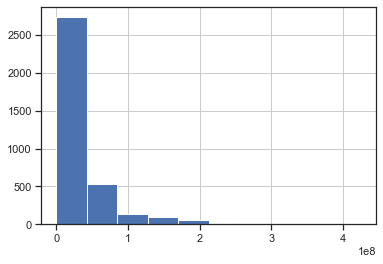

In [39]:
#Looks like the vast majority of films have a budget beneath $200,000,000
money_chungus['production_budget'].hist()

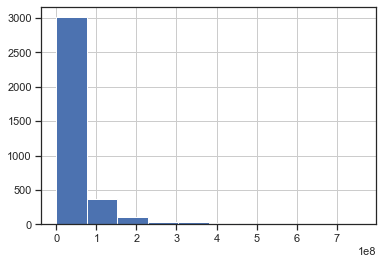

In [40]:
#Let's see if this translates to domestic gross as well:
money_chungus['domestic_gross'].hist()

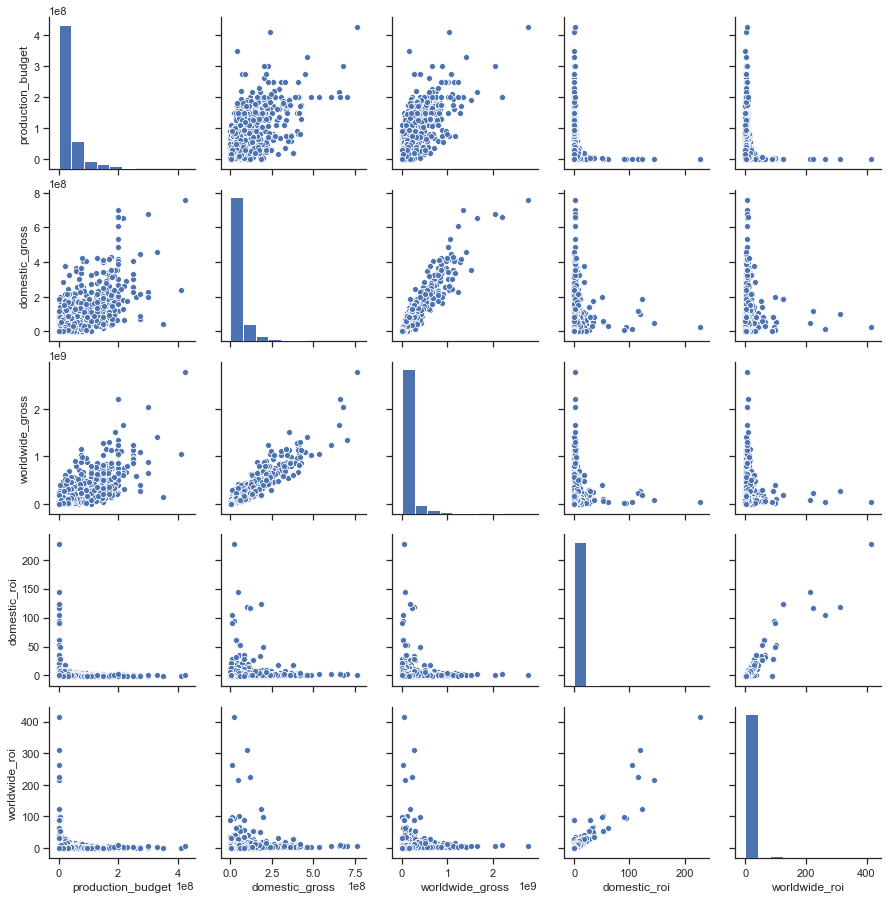

In [41]:
#Definitely, let's look and see a scatter matrix on these points: 
money_table = money_chungus[['production_budget','domestic_gross','worldwide_gross', 'domestic_roi', 'worldwide_roi']]
sns.pairplot(money_table);

In [42]:
money_table.corr()

,production_budget,domestic_gross,worldwide_gross,domestic_roi,worldwide_roi
production_budget,1.000000,0.683359,0.749260,-0.098048,-0.110570
domestic_gross,0.683359,1.000000,0.941986,0.130815,0.079643
worldwide_gross,0.749260,0.941986,1.000000,0.068022,0.076473
domestic_roi,-0.098048,0.130815,0.068022,1.000000,0.741219
worldwide_roi,-0.110570,0.079643,0.076473,0.741219,1.000000


## Lots of correlation to explore here - it seems that the worldwide and domestic fiscal firgures are very closely related so for now we'll stick with worldwide firures.

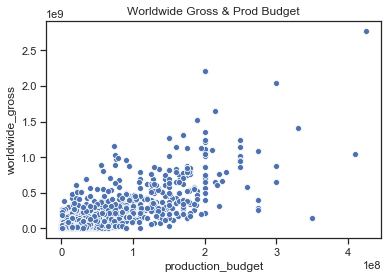

In [43]:
#The relationships between budget and revenue might be worth diving into:
sns.scatterplot(money_chungus['production_budget'], money_chungus['worldwide_gross']).set_title('Worldwide Gross & Prod Budget');

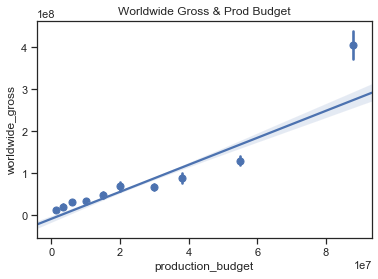

In [44]:
#Looks a bit more scattered than I would expect for such a high correlation, let's see if we can learn where outliers begin:
sns.regplot(money_chungus['production_budget'], money_chungus['worldwide_gross'], x_bins=10).set_title('Worldwide Gross & Prod Budget');


In [45]:
#looks like these regression analyses do not explain as much above budgets of 150 million. Let's define that and come back to those.
top_budgets = money_chungus.loc[big_chungus['production_budget'] > 150_000_000]
len(top_budgets)

119

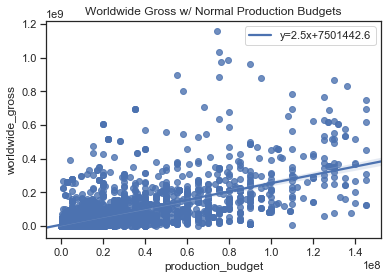

0.6064940677207057


In [46]:
#We'll come back to those 119 movies later, for now let's see if we can explain budget v. revenue in MOST movies: 
normal_budgets = money_chungus.loc[big_chungus['production_budget'] < 150_000_000]
#Build a regression plot that can tell us what a dollar of production investment is worth:
slope, intercept, r_value, p_value, std_err = stats.linregress(normal_budgets['production_budget'],normal_budgets['worldwide_gross'])
ax = sns.regplot(x="production_budget", y="worldwide_gross", data=normal_budgets, color='b', 
 line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
ax.set_title('Worldwide Gross w/ Normal Production Budgets')
ax.legend()
plt.show()
print(r_value)

## For every dollar Microsoft invests in normal production budgets (up to $1.5 million), they can expect $2.50 back in revenue.

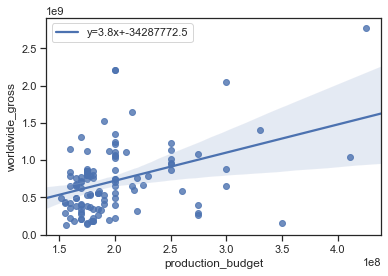

0.40190045580539424


In [47]:
#Does this hold true for big budget movies? 
slope, intercept, r_value, p_value, std_err = stats.linregress(top_budgets['production_budget'],top_budgets['worldwide_gross'])
axtop = sns.regplot(x="production_budget", y="worldwide_gross", data=top_budgets, color='b', 
 line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
axtop.legend()
plt.show()
print(r_value)

## There is less certainty but it seems that typically, films iwht budgets over $1.5 million generate $3.80 for each dollar spent on budget.

# That's how production budget can relate to generating revenue. Let's look at how these two factors relate to a studio's return on investment:

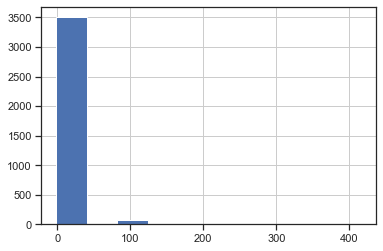

In [48]:
#Outliers seem to skew the distrobution of roi:
money_chungus['worldwide_roi'].hist()

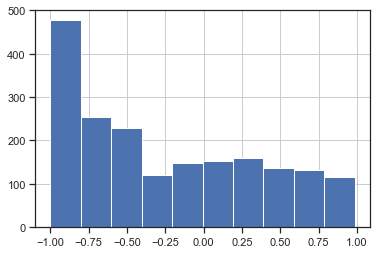

In [49]:
#The vast majority of films acheived a net return on investment between -1 and 1 so let's see those values on a histogram:
normal_roi = money_table[money_table['worldwide_roi'] < 1]
normal_roi = normal_roi[normal_roi['worldwide_roi'] > -1]
normal_roi.worldwide_roi.hist();

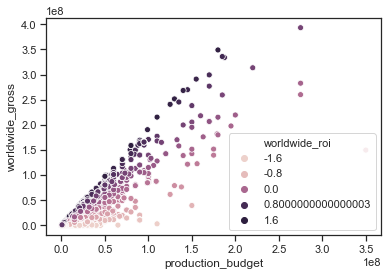

In [50]:
#Within a normal return on investment let's see how revenue relates to the revenue/production relationship:
sns.scatterplot(normal_roi['production_budget'], normal_roi['worldwide_gross'], hue=normal_roi['worldwide_roi']);

## Movies with the best ROI efficiently maximixe revenue within their relationship to production budget. So what revenue should we expect for a given budget? 

In [51]:
#We'll subset our sample one more time to build a formula for the most succesful movies in terms of ROI:
best_roi = money_table[money_table['worldwide_roi'] < 1]
best_roi = best_roi[best_roi['worldwide_roi'] > .8]

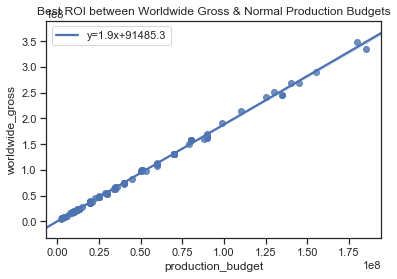

0.9990490183962969


In [54]:
slope, intercept, r_value, p_value, std_err = stats.linregress(best_roi['production_budget'],best_roi['worldwide_gross'])
ax = sns.regplot(x="production_budget", y="worldwide_gross", data=best_roi, color='b', 
 line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
ax.set_title('Best ROI between Worldwide Gross & Normal Production Budgets')
ax.legend()
plt.show()
print(r_value)

This regression gives us a formula to calculate revenue goals for a given production budget. As an example:

If Microsoft plans to make a film with a $1,000,000 budget then:

Worldwide Expected Revenue (ROI of 1) = 1.9 * $1,000,000.00 + $91,485.30
Worldwide Expected Revenue (ROI of 1) = $1,991,485.30

Thus for a production budget of 1,000,000 USD, Microsoft should anticipate and strive towards a worldwide revenue of $1,991,485.30. Of course this figure is built on the reasonable benchmark of ROI equal to 1.

# In this workbook we've established a positive relationship between revenue generation and production budgets up to 1.5 million dollars. We've also seen how in order to maximize return on investment, movies must maximize revenue earned. In the next notebook, let's look at what other factors maximize these measures.